# 4.10 Part 2: Coding Etiquette & Excel Reporting

I ran out of room in my other notebook because my Kernel kept restarting.  I decided to open a fresh new notebook to work with.

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Import updated instacart_data DataFrame
instacart_data = pd.read_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/2 Data/2 Prepared Data/instacart_data_final')

# Creating customer Categories based on age and charts to show breakdown

In [35]:
# Define conditions for each profile
conditions2 = [
    (instacart_data['Age'] < 30),
    (instacart_data['Age'].between(30, 44)),
    (instacart_data['Age'].between(45, 64)),
    (instacart_data['Age'] > 64)
]

# Define profiles that correspond to each condition
profiles2 = [
    'Young Adult: <30',
    'Adult: 30-44',
    'Middle Aged Adult: 45-64',
    'Senior: 65+',
]

In [37]:
# Apply conditions to create the 'customer_profile' column
instacart_data['age_group'] = np.select(conditions2, profiles2, default='Other')

In [38]:
#Count the number of each customer profile
age_counts = instacart_data['age_group'].value_counts()

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44980/2483978946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')


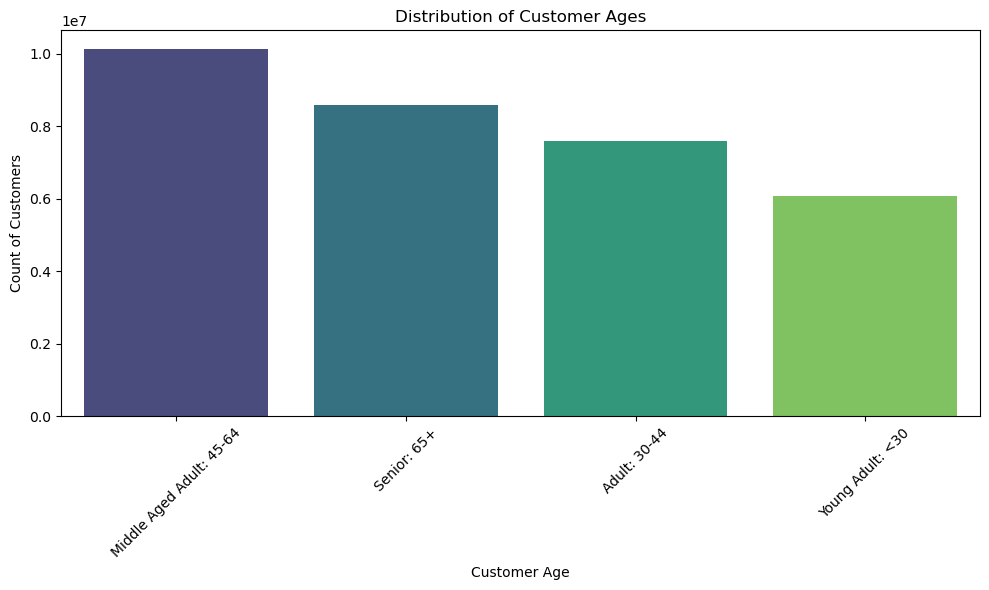

In [40]:
#Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title('Distribution of Customer Ages')
plt.xlabel('Customer Age')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

#Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'age_groups_bar.png'))

#Display the plot
plt.show()

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44980/2743769620.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_totals.index, y=age_group_totals.values, palette='viridis', order=order)


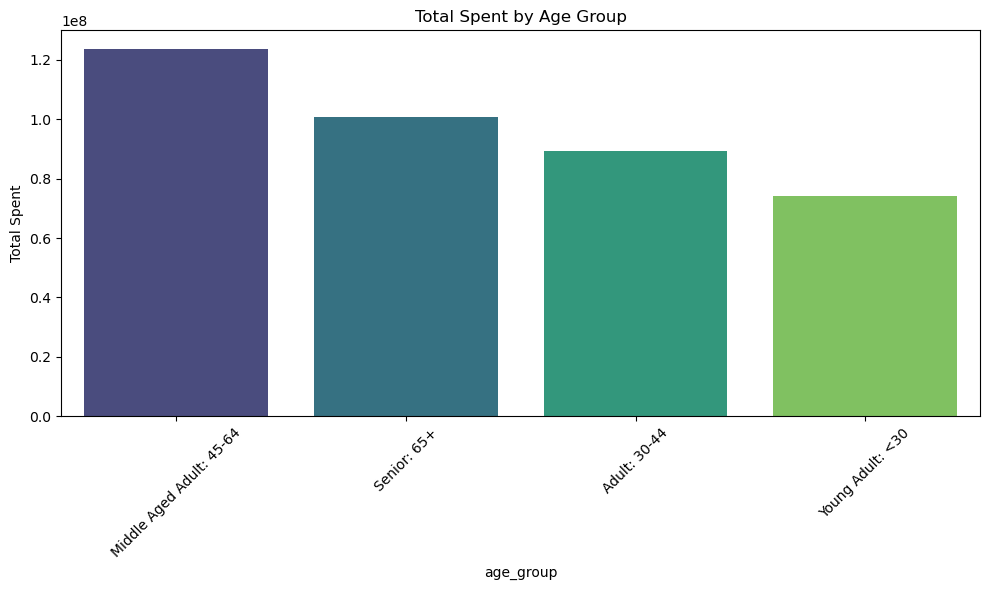

In [43]:
# Calculate the total spent for each 'age_group'
age_group_totals = instacart_data.groupby('age_group')['prices'].sum()

# Get the order of categories based on 'age_group' value counts (if you want it in a specific order)
order = instacart_data['age_group'].value_counts().index

# Plot a bar chart with the specified order and palette
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_totals.index, y=age_group_totals.values, palette='viridis', order=order)
plt.title('Total Spent by Age Group')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'age_group_total_spent_bar.png'))

# Display the plot
plt.show()

# Creating Bar Chart for Family Status

In [47]:
unique_values = instacart_data['fam_status'].unique()
print(unique_values)

['married' 'divorced/widowed' 'single' 'living with parents and siblings']


In [49]:
#Count the number of each customer profile
mar_status = instacart_data['fam_status'].value_counts()

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44980/3935728197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mar_status.index, y=mar_status.values, palette='viridis')


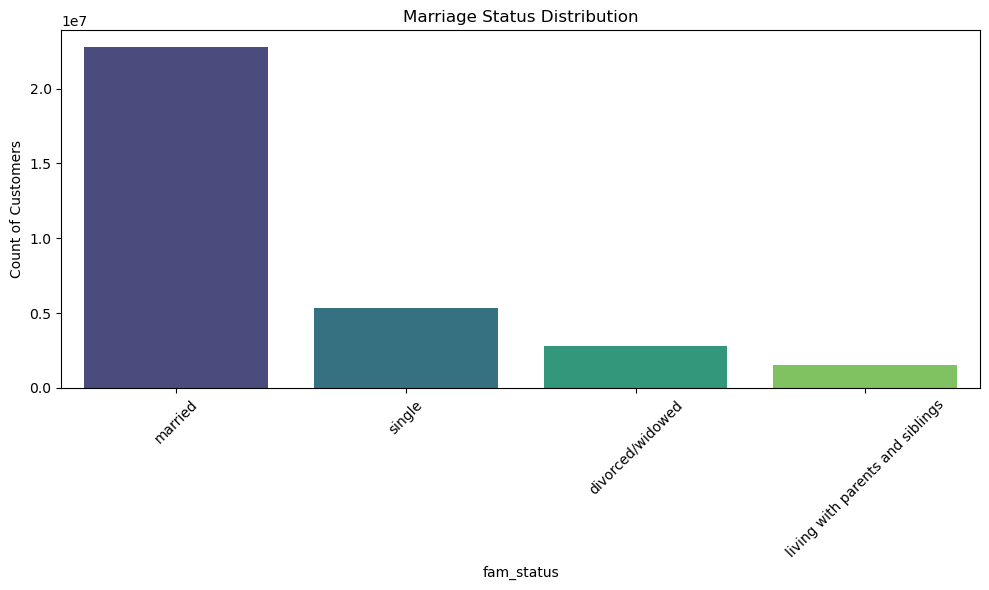

In [51]:
#Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mar_status.index, y=mar_status.values, palette='viridis')
plt.title('Marriage Status Distribution')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

#Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'mar_status_bar.png'))

#Display the plot
plt.show()

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44980/2801119931.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fam_status_totals.index, y=fam_status_totals.values, palette='viridis', order=order)


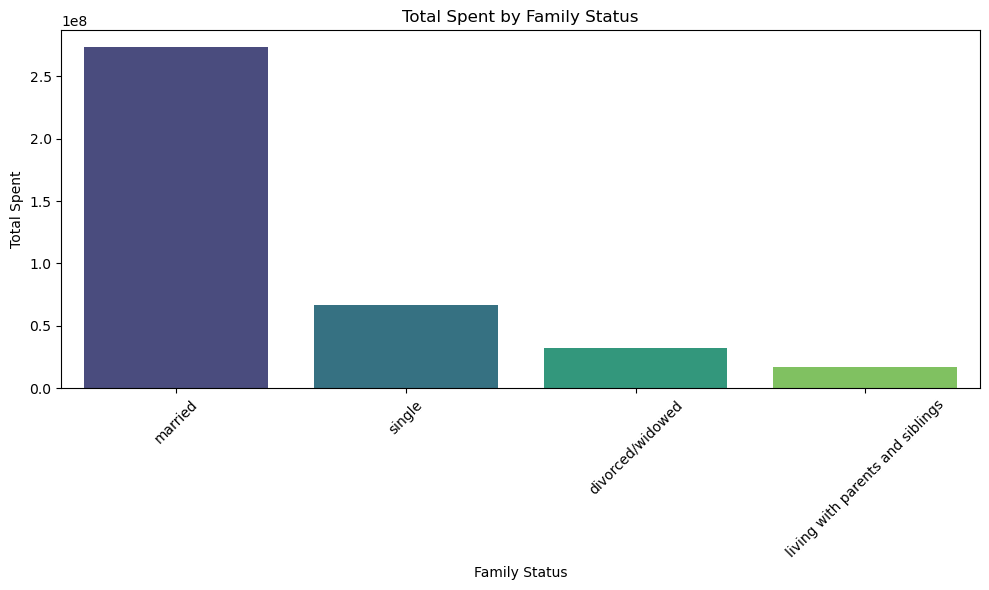

In [53]:
# Calculate the total spent for each 'fam_status'
fam_status_totals = instacart_data.groupby('fam_status')['prices'].sum()

# Get the order of categories based on the previous 'fam_status' value counts
order = instacart_data['fam_status'].value_counts().index

# Plot a bar chart with the specified order and palette
plt.figure(figsize=(10, 6))
sns.barplot(x=fam_status_totals.index, y=fam_status_totals.values, palette='viridis', order=order)
plt.title('Total Spent by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'fam_status_total_spent_bar.png'))

# Display the plot
plt.show()

# Create stacked bar chart showing department by region

In [56]:
#Group by department and customer profile and calculate counts
region_department_counts = instacart_data.groupby(['department_id', 'region']).size().unstack(fill_value=0)

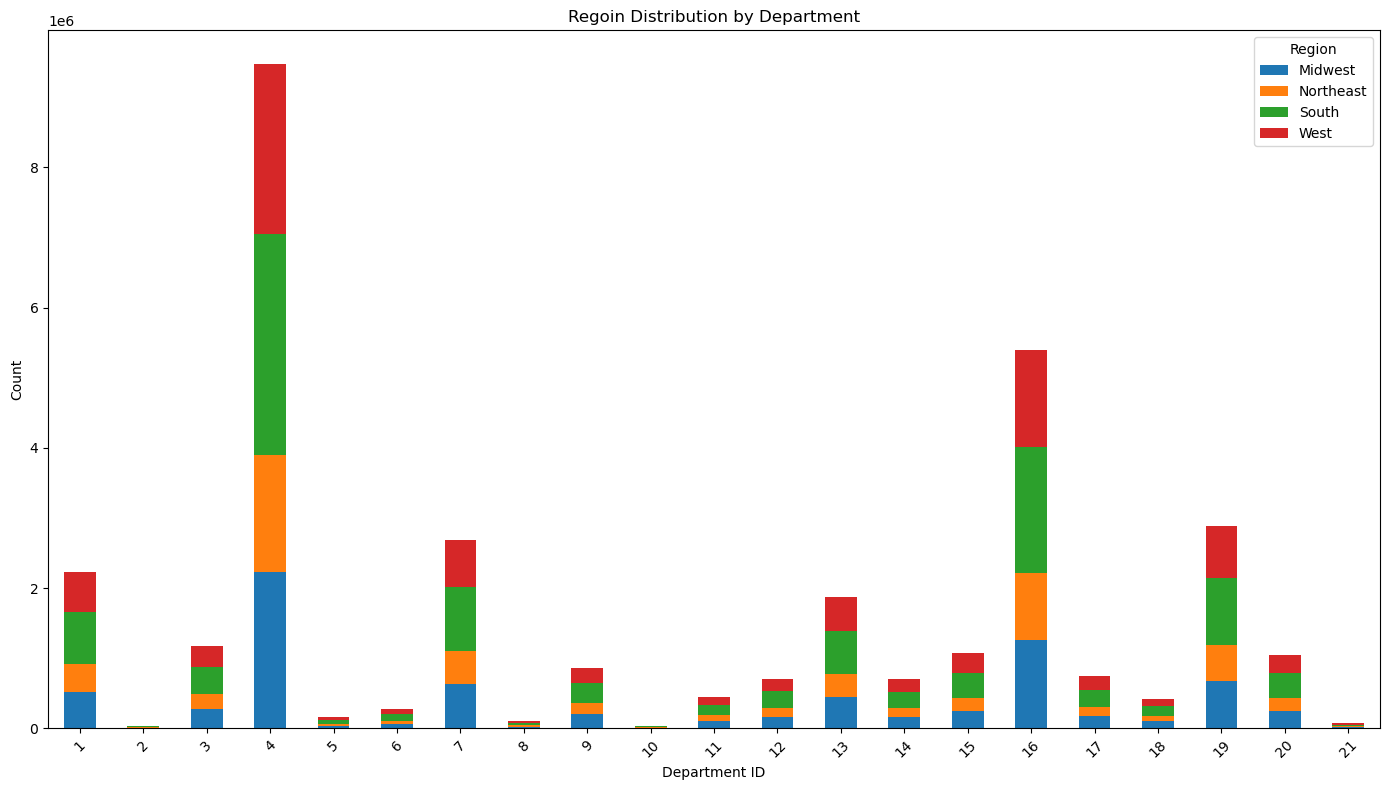

In [58]:
# Plot stacked bar chart
region_department_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Regoin Distribution by Department')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'region_department_counts_bar'))

# Display the plot
plt.show()

# Create Bar chart showing 'prices' by 'region'

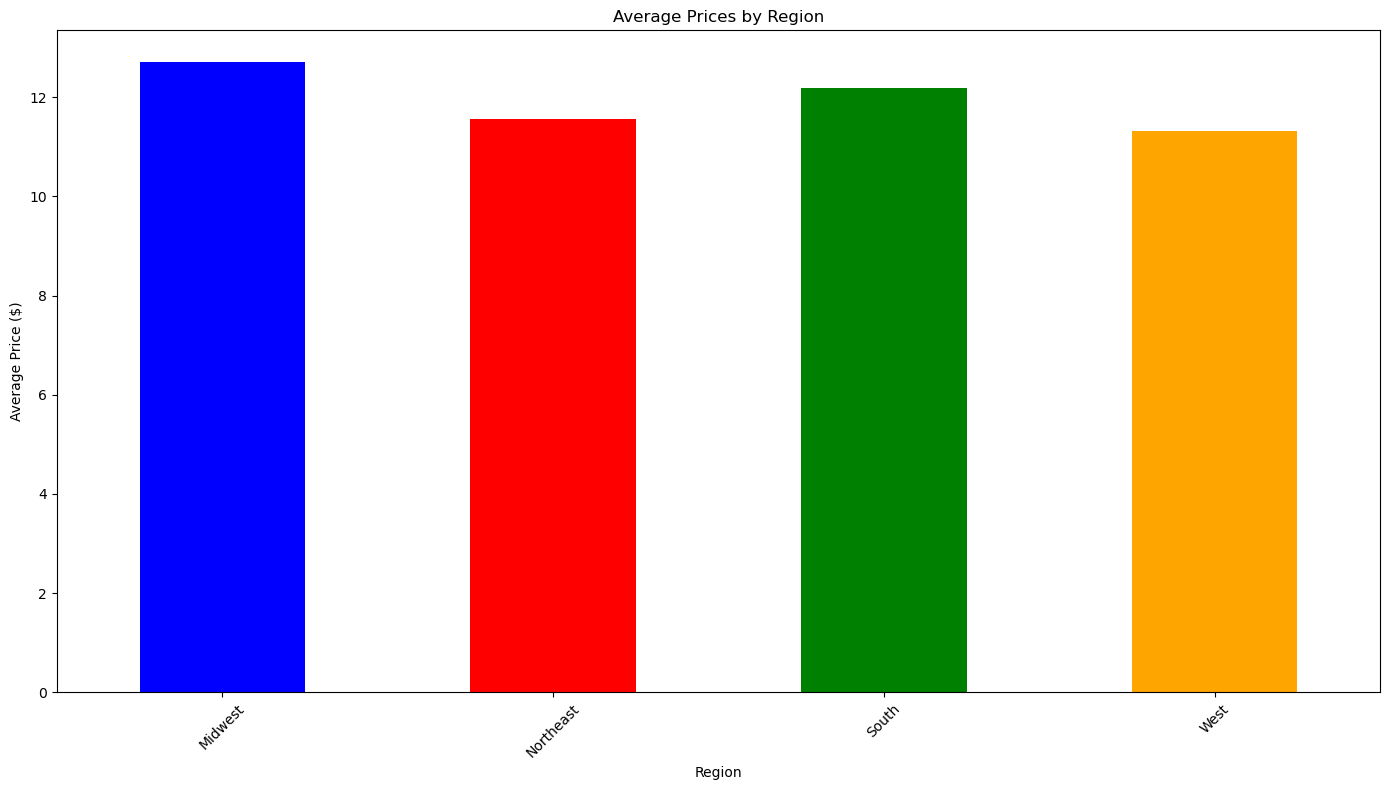

In [61]:
# Calculate the average price per region
region_avg_prices = instacart_data.groupby('region')['prices'].mean()

# Define custom colors for each region in the order they appear in `region_avg_prices`
region_colors = {
    'Midwest': 'blue',
    'Northeast': 'red',
    'South': 'green',
    'West': 'orange'
}
colors = [region_colors[region] for region in region_avg_prices.index]

# Plot bar chart for average prices per region with custom colors
plt.figure(figsize=(14, 8))
region_avg_prices.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Average Prices by Region')
plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'region_avg_prices_bar.png'))

# Display the plot
plt.show()


# Create new column 'income_level' using 'income' to make pie chart based on 'income_level'

In [8]:
# Define conditions for each profile
conditions4 = [
    (instacart_data['income'] < 70000),
    (instacart_data['income'].between(70000, 120000)),
    (instacart_data['income'] > 120000)
]

# Define profiles that correspond to each condition
profiles4 = [
    'Low Income: <$70,000',
    'Middle Income: $70,000-120,000',
    'High Income: $120,000+'
]

# Create the new 'income_level' column
instacart_data['income_level'] = np.select(conditions4, profiles4, default='Unknown')

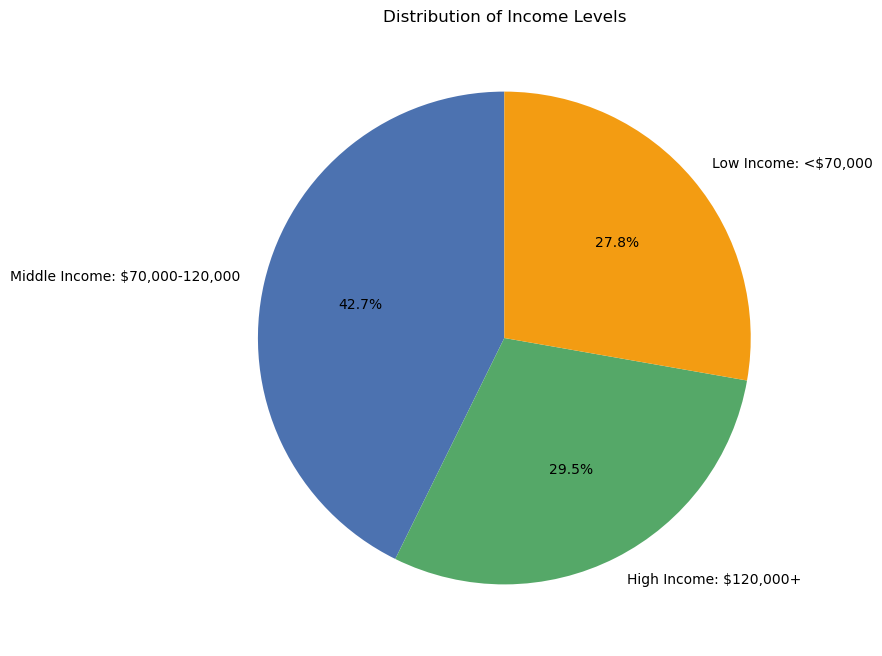

In [13]:
# Count the occurrences of each income level
income_level_counts = instacart_data['income_level'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
income_level_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4c72b0', '#55a868', '#f39c12'])
plt.title("Distribution of Income Levels")
plt.ylabel('')  # Optional: removes the default y-axis label for pie charts

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'income_level_distribution_pie.png'))

# Display the plot
plt.show()

# Create pie chart showing the distribution of 'gender'

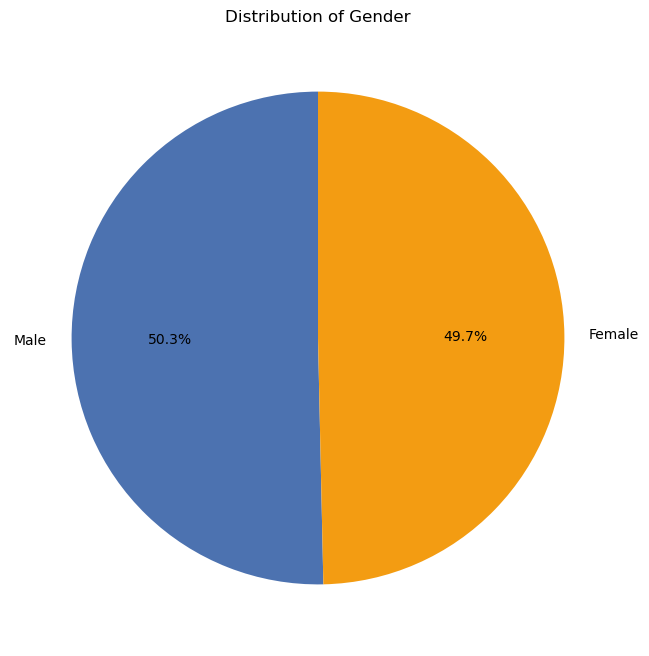

In [18]:
# Count the occurrences of each gender
gender_counts = instacart_data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4c72b0', '#f39c12'])
plt.title("Distribution of Gender")
plt.ylabel('')  # Optional: removes the default y-axis label for pie charts

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'gender_distribution_pie.png'))

# Display the plot
plt.show()

In [20]:
instacart_data.head()

,order_id,user_id,order_number,orders_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,merge_status_new,region,low_activity,customer_profile,age_group,income_level
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,both,South,False,Low-Income Family,Adult: 30-44,"Low Income: <$70,000"
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,both,South,False,Low-Income Family,Adult: 30-44,"Low Income: <$70,000"
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,2/17/2019,3,married,40423,both,South,False,Low-Income Family,Adult: 30-44,"Low Income: <$70,000"
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,both,South,False,Low-Income Family,Adult: 30-44,"Low Income: <$70,000"
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2/17/2019,3,married,40423,both,South,False,Low-Income Family,Adult: 30-44,"Low Income: <$70,000"


# Create bar chart showing the average 'prices' by 'age_group'

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44980/2102826530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_avg_prices.index, y=age_group_avg_prices.values, palette='viridis')


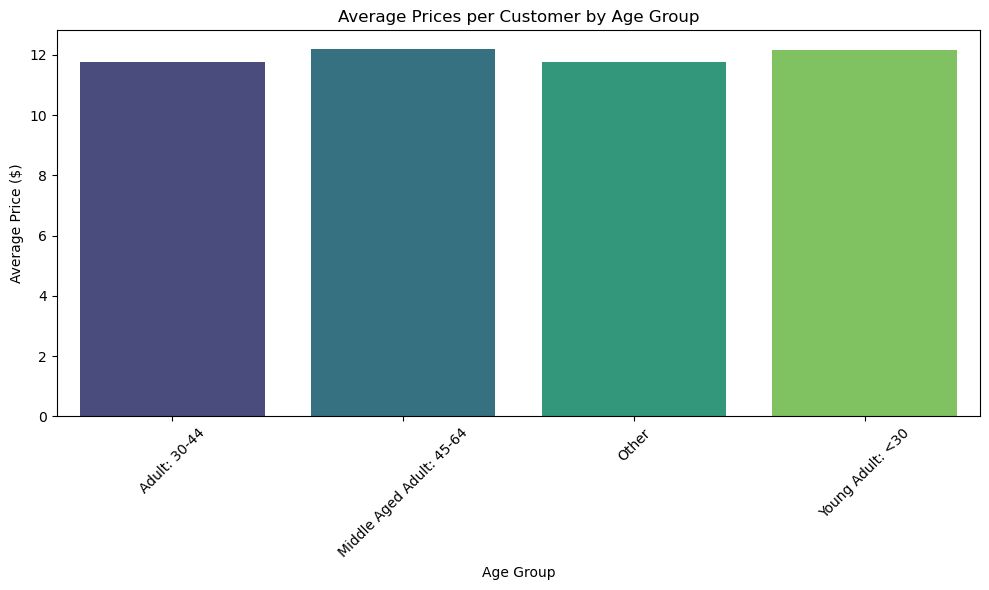

In [23]:
# Calculate the average prices per customer for each age group
age_group_avg_prices = instacart_data.groupby('age_group')['prices'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_avg_prices.index, y=age_group_avg_prices.values, palette='viridis')
plt.title('Average Prices per Customer by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'age_group_avg_prices_bar.png'))

# Display the plot
plt.show()

# Create bar chart showing average 'prices'  by 'fam_status'

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44980/1204549234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fam_status_avg_prices.index, y=fam_status_avg_prices.values, palette='viridis')


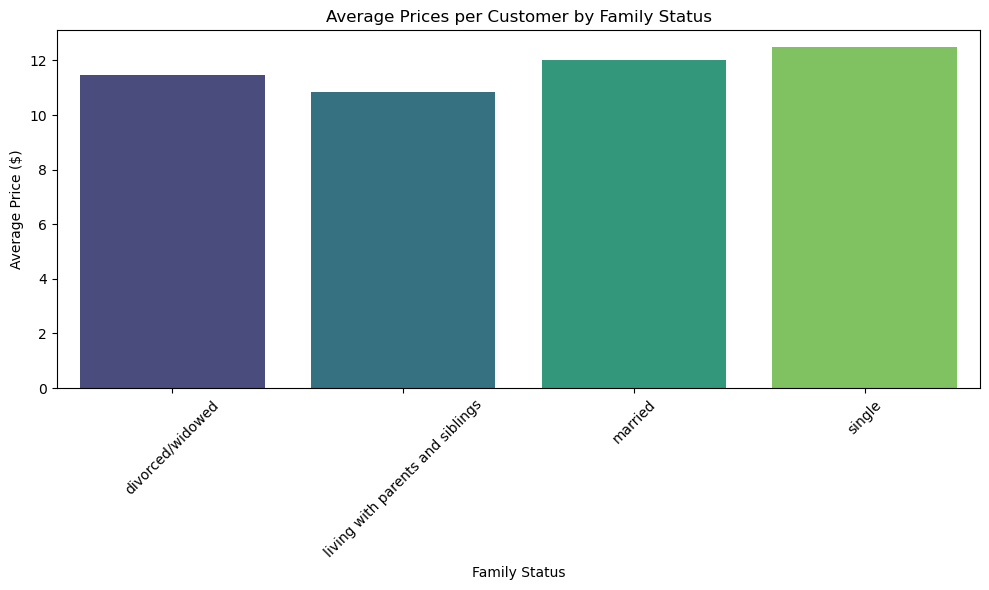

In [26]:
# Calculate the average prices per customer for each family status
fam_status_avg_prices = instacart_data.groupby('fam_status')['prices'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=fam_status_avg_prices.index, y=fam_status_avg_prices.values, palette='viridis')
plt.title('Average Prices per Customer by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'fam_status_avg_prices_bar.png'))

# Display the plot
plt.show()

# Create bar chart showing average 'prices' by 'income_level'

/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44980/931778486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_level_avg_prices.index, y=income_level_avg_prices.values, palette='viridis')


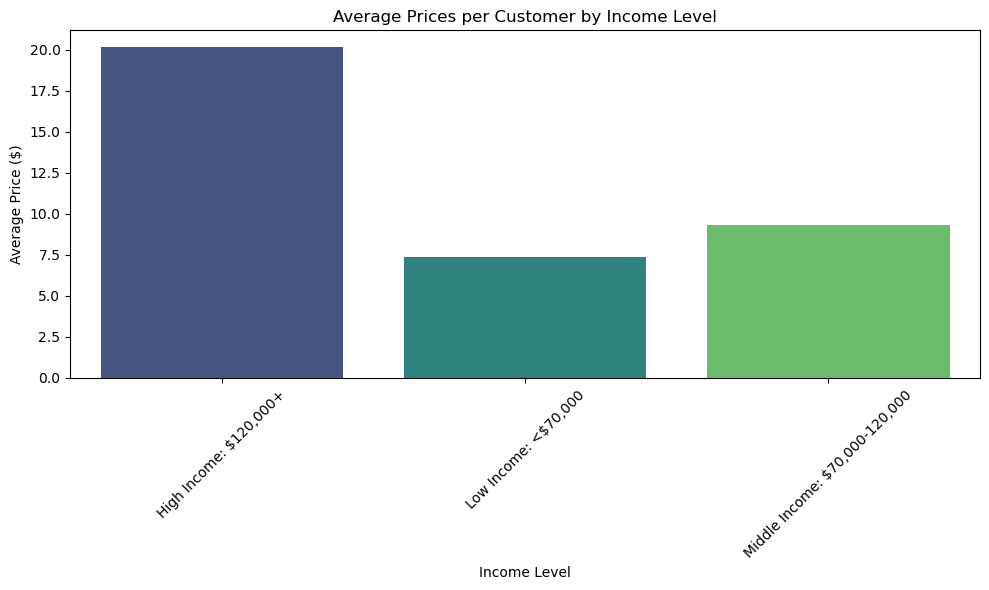

In [30]:
# Calculate the average prices per customer for each income level
income_level_avg_prices = instacart_data.groupby('income_level')['prices'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=income_level_avg_prices.index, y=income_level_avg_prices.values, palette='viridis')
plt.title('Average Prices per Customer by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join('/Users/ariedlin/Desktop/Career Foundry Assignments/8-24 Instacart Blanket Analysis Real/4 Analysis/1 Visualizations', 'income_level_avg_prices_bar.png'))

# Display the plot
plt.show()
